In [193]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from mpl_toolkits import mplot3d

import seaborn
seaborn.set(font_scale=1.5,style='ticks')

In [26]:
class torus:
    
    def __init__(self,R: float, r: float):
        self.R = R
        self.r = r
    
        self.pos = namedtuple("Position",['theta','phi'])
        self.embed3d = namedtuple("Embed",['x','y','z'])
        self.pos.theta = 0
        self.pos.phi = 0
        
    def move(self, epsilon_theta:float=1e-2, epsilon_phi:float=1e-2):
        
        self.pos.theta = (self.pos.theta+epsilon_theta)%(2*np.pi)
        
        self.pos.phi = (self.pos.phi+epsilon_phi)%(2*np.pi)
        
    def embed(self):
        self.embed3d.x = (self.R + self.r*np.cos(self.pos.theta))*np.cos(self.pos.phi)
        self.embed3d.y = (self.R + self.r*np.cos(self.pos.theta))*np.sin(self.pos.phi)
        self.embed3d.z = self.r*np.sin(self.pos.theta)

In [179]:
t = torus(1,.5)

In [180]:
t.move()

In [181]:
t.embed()

In [244]:
xs = []; ys = []; zs = []

n_points = 200
n_rev = 50
angles = []
for i in range(n_points):
    
    for j in range(n_points):
        angles.append([t.pos.theta,t.pos.phi])
        t.embed()
        
        xs.append(t.embed3d.x)
        ys.append(t.embed3d.y)
        zs.append(t.embed3d.z)
        t.move(2*np.pi/n_rev,0)
    t.move(0,2*np.pi/(n_rev*2))

In [245]:
embed_arr = np.vstack([xs,ys,zs]).T
angles = np.array(angles)
theta = np.array([1,1,1])
theta_angles = np.array([.2,5])

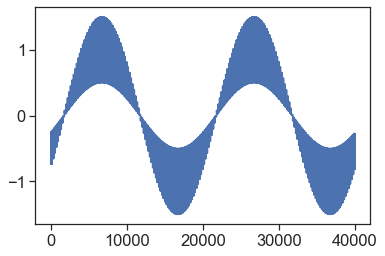

In [246]:
plt.plot(embed_arr[:,0])

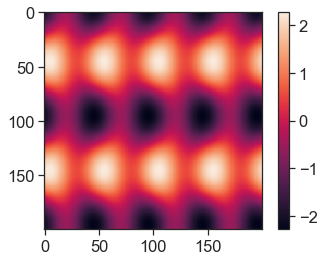

In [247]:
plt.imshow((embed_arr@theta).reshape(n_points,n_points))
plt.colorbar()

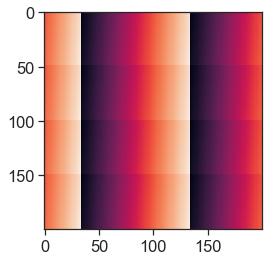

In [248]:
plt.imshow((angles@theta_angles).reshape(n_points,n_points,order='F'))

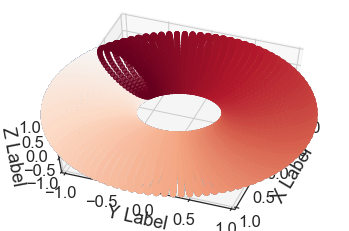

In [249]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(xs, ys, zs, marker='o',c=seaborn.color_palette("RdBu_r",n_colors=len(xs)))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

lm = 1

ax.set_xlim(-lm,lm)
ax.set_ylim(-lm,lm)
ax.set_zlim3d(-lm,lm)
ax.view_init(60,20)

# How do you twist a torus